In [1]:
import pandas as pd
# Specify the file path
file_path = "Bird_Monitoring_Data_GRASSLAND.XLSX"

# Read the Excel file with multiple sheets
excel_data = pd.ExcelFile(file_path)

# Get all sheet names
sheet_names = excel_data.sheet_names

# Read data from all sheets into a dictionary
sheets_dict = {sheet: excel_data.parse(sheet) for sheet in sheet_names}

In [ ]:
# Example: Convert sheets_dict to a single DataFrame; this will add a new sheet column at the last.
combined_df = pd.concat(
    [df.assign(Sheet=sheet_name) for sheet_name, df in sheets_dict.items()],
    ignore_index=True
)

In [3]:
# later u can Drop the 'Sheet' column
combined_df = combined_df.drop(columns=['Sheet'])

In [ ]:
combined_df

In [ ]:
combined_df.count()

In [ ]:
combined_df.isna().sum()

In [7]:
combined_df.drop(columns=['Sub_Unit_Code'], inplace=True)

In [8]:
combined_df.shape

(8531, 28)

In [ ]:
mode_value = combined_df['Distance'].mode()[0]
combined_df['Distance'].fillna(mode_value, inplace=True)

In [10]:
missing_id_method_rows = combined_df[combined_df['ID_Method'].isna()]

In [11]:
pd.set_option('display.max_columns', None)

In [12]:
missing_id_method_rows 

,Admin_Unit_Code,Plot_Name,Location_Type,Year,Date,Start_Time,End_Time,Observer,Visit,Interval_Length,ID_Method,Distance,Flyover_Observed,Sex,Common_Name,Scientific_Name,AcceptedTSN,TaxonCode,AOU_Code,PIF_Watchlist_Status,Regional_Stewardship_Status,Temperature,Humidity,Sky,Wind,Disturbance,Previously_Obs,Initial_Three_Min_Cnt
1904,ANTI,ANTI-0140,Grassland,2018,2018-06-26,09:38:00,09:48:00,Kimberly Serno,2,7.5 - 10 min,NaN,50 - 100 Meters,True,Undetermined,American Crow,Corvus brachyrhynchos,179731.0,87106.0,AMCR,False,False,29.6,50.299999,Partly Cloudy,Light breeze (4-7 mph) wind felt on face,Slight effect on count,False,False


In [13]:
filter= combined_df[combined_df["AOU_Code"]=="AMCR"]

In [14]:
filter.head(20)

,Admin_Unit_Code,Plot_Name,Location_Type,Year,Date,Start_Time,End_Time,Observer,Visit,Interval_Length,ID_Method,Distance,Flyover_Observed,Sex,Common_Name,Scientific_Name,AcceptedTSN,TaxonCode,AOU_Code,PIF_Watchlist_Status,Regional_Stewardship_Status,Temperature,Humidity,Sky,Wind,Disturbance,Previously_Obs,Initial_Three_Min_Cnt
5,ANTI,ANTI-0054,Grassland,2018,2018-05-22,05:35:00,05:45:00,Elizabeth Oswald,1,0-2.5 min,Calling,50 - 100 Meters,False,Undetermined,American Crow,Corvus brachyrhynchos,179731.0,87106.0,AMCR,False,False,20.000000,79.000000,Cloudy/Overcast,Light breeze (4-7 mph) wind felt on face,Slight effect on count,False,True
115,ANTI,ANTI-0053,Grassland,2018,2018-05-23,05:40:00,05:50:00,Elizabeth Oswald,1,0-2.5 min,Calling,50 - 100 Meters,False,Undetermined,American Crow,Corvus brachyrhynchos,179731.0,87106.0,AMCR,False,False,21.000000,79.199997,Cloudy/Overcast,Light breeze (4-7 mph) wind felt on face,Slight effect on count,False,True
163,ANTI,ANTI-0017,Grassland,2018,2018-05-23,06:47:00,06:57:00,Elizabeth Oswald,1,5 - 7.5 min,Visualization,50 - 100 Meters,True,Undetermined,American Crow,Corvus brachyrhynchos,179731.0,87106.0,AMCR,False,False,22.000000,77.500000,Partly Cloudy,Light air movement (1-3 mph) smoke drifts,No effect on count,False,False
198,ANTI,ANTI-0008,Grassland,2018,2018-05-23,07:19:00,07:29:00,Elizabeth Oswald,1,7.5 - 10 min,Calling,50 - 100 Meters,False,Undetermined,American Crow,Corvus brachyrhynchos,179731.0,87106.0,AMCR,False,False,23.900000,74.199997,Partly Cloudy,Light breeze (4-7 mph) wind felt on face,Slight effect on count,False,False
301,ANTI,ANTI-0034,Grassland,2018,2018-05-23,08:48:00,08:58:00,Elizabeth Oswald,1,7.5 - 10 min,Calling,<= 50 Meters,False,Undetermined,American Crow,Corvus brachyrhynchos,179731.0,87106.0,AMCR,False,False,26.500000,59.500000,Partly Cloudy,Light breeze (4-7 mph) wind felt on face,Slight effect on count,False,False
313,ANTI,ANTI-0043,Grassland,2018,2018-05-23,09:04:00,09:14:00,Elizabeth Oswald,1,5 - 7.5 min,Calling,50 - 100 Meters,False,Undetermined,American Crow,Corvus brachyrhynchos,179731.0,87106.0,AMCR,False,False,27.600000,59.900002,Partly Cloudy,"Gentle breeze (8-12 mph), leaves in motion",Slight effect on count,False,False
406,ANTI,ANTI-0116,Grassland,2018,2018-05-24,05:37:00,05:47:00,Kimberly Serno,1,0-2.5 min,Calling,50 - 100 Meters,False,Undetermined,American Crow,Corvus brachyrhynchos,179731.0,87106.0,AMCR,False,False,18.100000,68.099998,Partly Cloudy,Light air movement (1-3 mph) smoke drifts,Slight effect on count,False,True
410,ANTI,ANTI-0091,Grassland,2018,2018-05-24,06:35:00,06:45:00,Kimberly Serno,1,2.5 - 5 min,Calling,50 - 100 Meters,False,Undetermined,American Crow,Corvus brachyrhynchos,179731.0,87106.0,AMCR,False,False,12.900000,83.300003,Partly Cloudy,Light air movement (1-3 mph) smoke drifts,Slight effect on count,False,True
437,ANTI,ANTI-0108,Grassland,2018,2018-05-24,07:29:00,07:39:00,Kimberly Serno,1,0-2.5 min,Calling,<= 50 Meters,False,Undetermined,American Crow,Corvus brachyrhynchos,179731.0,87106.0,AMCR,False,False,14.400000,89.599998,Clear or Few Clouds,Light air movement (1-3 mph) smoke drifts,Slight effect on count,False,True
453,ANTI,ANTI-0079,Grassland,2018,2018-05-24,06:51:00,07:01:00,Kimberly Serno,1,5 - 7.5 min,Visualization,50 - 100 Meters,True,Undetermined,American Crow,Corvus brachyrhynchos,179731.0,87106.0,AMCR,False,False,12.900000,89.599998,Clear or Few Clouds,Light air movement (1-3 mph) smoke drifts,No effect on count,False,False


In [ ]:
combined_df["ID_Method"].fillna("Singing",inplace=True)

In [16]:
missing_id= combined_df[combined_df['AcceptedTSN'].isna()]

In [ ]:
missing_id

In [18]:
filter= combined_df[combined_df["Common_Name"]=="House Finch"]

In [ ]:
filter

In [ ]:
combined_df["AcceptedTSN"].fillna("NULL",inplace=True)

In [21]:
combined_df[combined_df["TaxonCode"].isna()]

,Admin_Unit_Code,Plot_Name,Location_Type,Year,Date,Start_Time,End_Time,Observer,Visit,Interval_Length,ID_Method,Distance,Flyover_Observed,Sex,Common_Name,Scientific_Name,AcceptedTSN,TaxonCode,AOU_Code,PIF_Watchlist_Status,Regional_Stewardship_Status,Temperature,Humidity,Sky,Wind,Disturbance,Previously_Obs,Initial_Three_Min_Cnt
2596,ANTI,ANTI-0075,Grassland,2018,2018-07-13,07:46:00,07:56:00,Kimberly Serno,3,0-2.5 min,Singing,50 - 100 Meters,False,Undetermined,Northwestern Crow,Corvus caurinus,179736.0,NaN,NOCR,False,False,23.9,72.300003,Partly Cloudy,Light air movement (1-3 mph) smoke drifts,No effect on count,False,True
5556,MONO,MONO-0096,Grassland,2018,2018-05-10,06:18:00,06:29:00,Brian Swimelar,1,0-2.5 min,Singing,50 - 100 Meters,False,Male,Chinese Pond-Heron,Ardeola bacchus,174861.0,NaN,CHPH,False,False,19.0,63.000000,Partly Cloudy,Calm (< 1 mph) smoke rises vertically,Moderate effect on count,False,True


In [22]:
combined_df[combined_df["Common_Name"]=="Chinese Pond-Heron"]

,Admin_Unit_Code,Plot_Name,Location_Type,Year,Date,Start_Time,End_Time,Observer,Visit,Interval_Length,ID_Method,Distance,Flyover_Observed,Sex,Common_Name,Scientific_Name,AcceptedTSN,TaxonCode,AOU_Code,PIF_Watchlist_Status,Regional_Stewardship_Status,Temperature,Humidity,Sky,Wind,Disturbance,Previously_Obs,Initial_Three_Min_Cnt
5556,MONO,MONO-0096,Grassland,2018,2018-05-10,06:18:00,06:29:00,Brian Swimelar,1,0-2.5 min,Singing,50 - 100 Meters,False,Male,Chinese Pond-Heron,Ardeola bacchus,174861.0,NaN,CHPH,False,False,19.0,63.0,Partly Cloudy,Calm (< 1 mph) smoke rises vertically,Moderate effect on count,False,True


In [ ]:
combined_df["TaxonCode"].fillna("NULL",inplace=True)

In [ ]:
combined_df.isna().sum()

In [ ]:
combined_df.head(5)

In [35]:
combined_df["Humidity"]=combined_df["Humidity"].round(0).astype(int)

In [36]:
combined_df["Temperature"]=combined_df["Temperature"].round(0).astype(int)

In [ ]:
combined_df.head(5)

In [39]:
combined_df.to_csv("grasslandbirds.csv",index=False)

In [25]:
import matplotlib.pyplot as plt
import seaborn as sns

<Axes: xlabel='ID_Method', ylabel='count'>

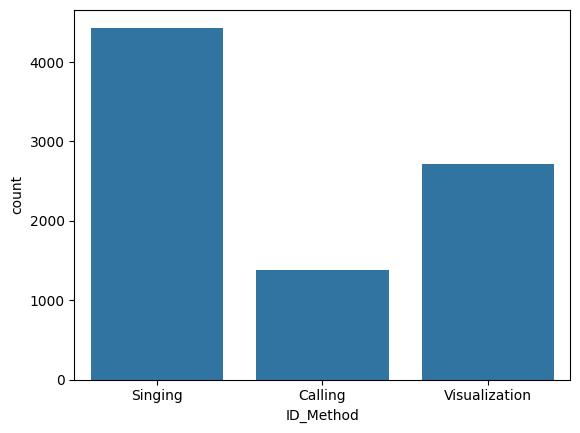

In [26]:
sns.countplot(x="ID_Method",data=combined_df) 

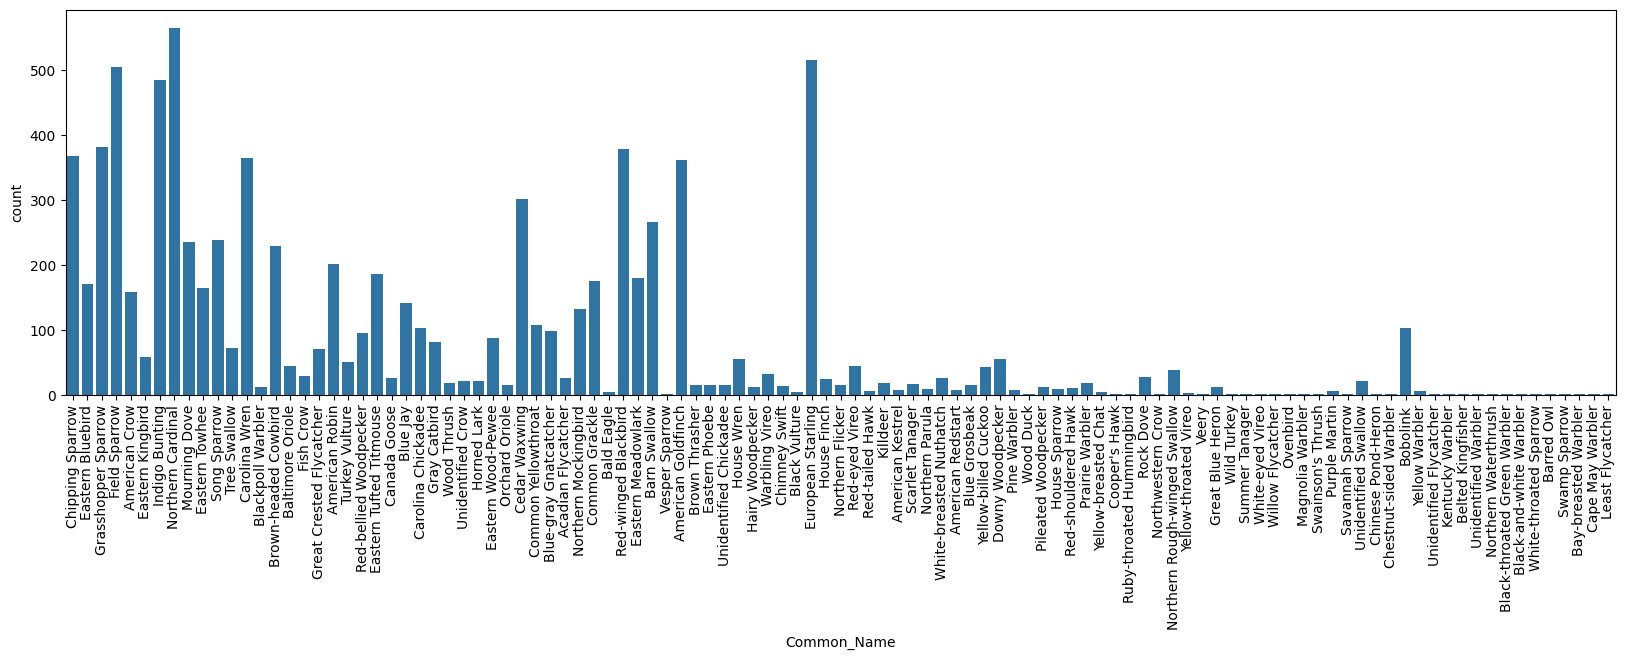

In [27]:
#Common_Name
plt.figure(figsize=(20,5))
sns.countplot(x="Common_Name",data=combined_df)
plt.xticks(rotation=90)
plt.show()

In [28]:
combined_df["Common_Name"].nunique()

107

<Axes: xlabel='Observer', ylabel='count'>

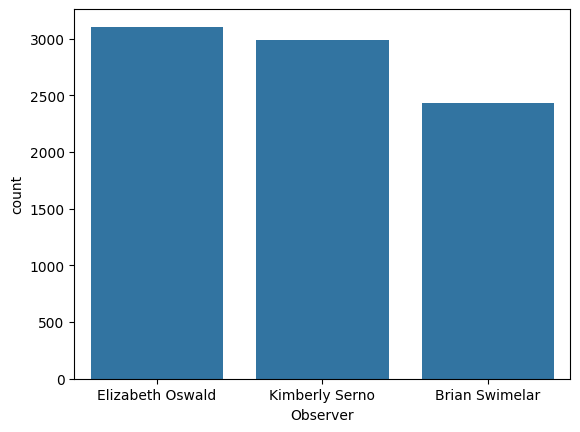

In [29]:
#Observer
sns.countplot(x="Observer",data=combined_df) 

<Axes: xlabel='PIF_Watchlist_Status', ylabel='count'>

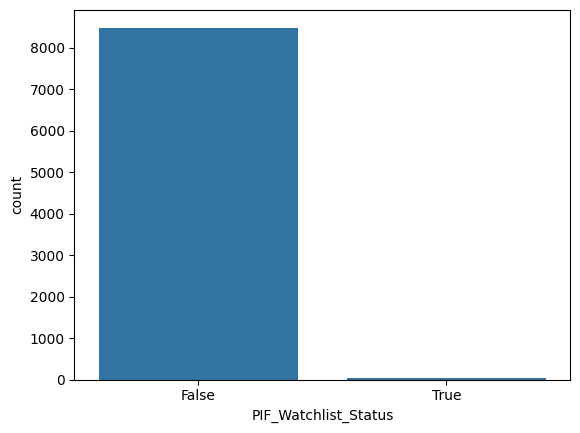

In [30]:
#	PIF_Watchlist_Status
sns.countplot(x="PIF_Watchlist_Status",data=combined_df) 

<Axes: xlabel='Admin_Unit_Code', ylabel='Plot_Name'>

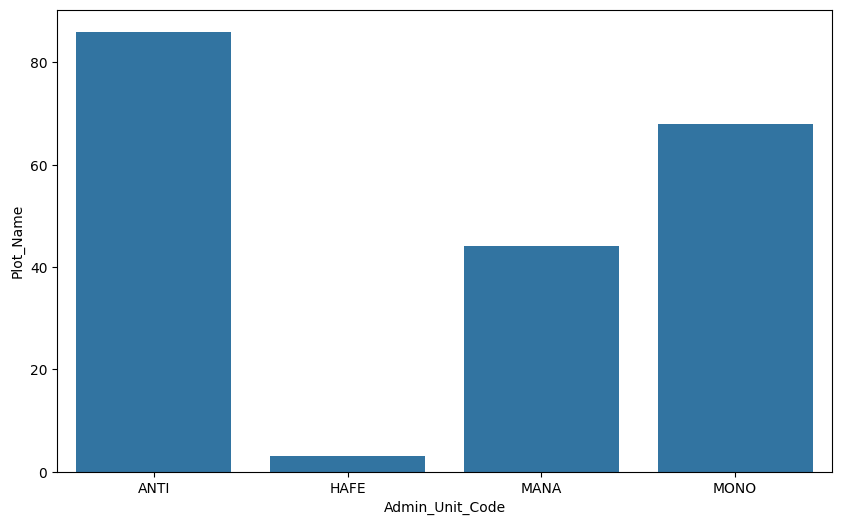

In [31]:
unique_sites = combined_df.groupby("Admin_Unit_Code")["Plot_Name"].nunique().reset_index()
plt.figure(figsize=(10, 6))
sns.barplot(data=unique_sites, x="Admin_Unit_Code", y="Plot_Name")

<Axes: xlabel='Sky', ylabel='Count'>

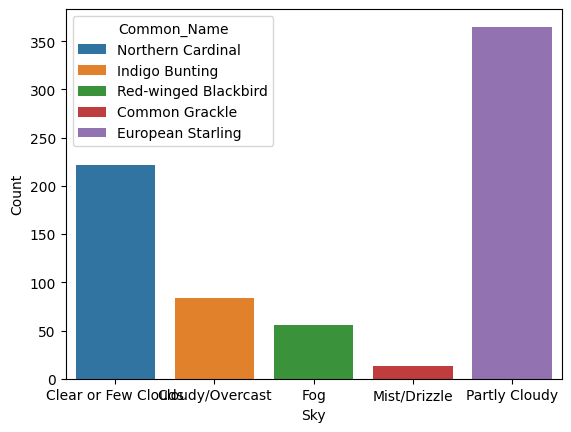

In [32]:
bird_count_by_sky = combined_df.groupby(["Sky", "Common_Name"]).size().reset_index(name="Count")
bird_count_by_sky_max = bird_count_by_sky.loc[bird_count_by_sky.groupby("Sky")["Count"].idxmax()]

# Find the bird with the maximum visits for each Sky

sns.barplot(data=bird_count_by_sky_max , x="Sky", y="Count", hue="Common_Name")